## IMPORTING LIBRARIES AND LOADING DATA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:\\Users\\91939\\Downloads\\archive (11)\\Clean_Dataset.csv",index_col=0)

In [4]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [7]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Price Distribution

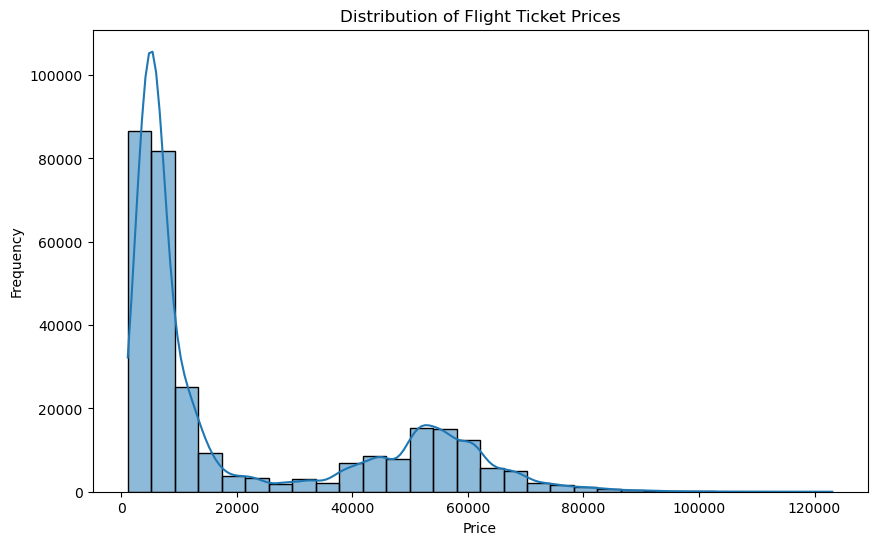

In [8]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Flight Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Calculate summary statistics
price_mean = data['price'].mean()
price_median = data['price'].median()
price_std = data['price'].std()
price_min = data['price'].min()
price_max = data['price'].max()

print(f"Mean Price: {price_mean}")
print(f"Median Price: {price_median}")
print(f"Standard Deviation of Price: {price_std}")
print(f"Minimum Price: {price_min}")
print(f"Maximum Price: {price_max}")

Mean Price: 20889.660523133203
Median Price: 7425.0
Standard Deviation of Price: 22697.767366075885
Minimum Price: 1105
Maximum Price: 123071


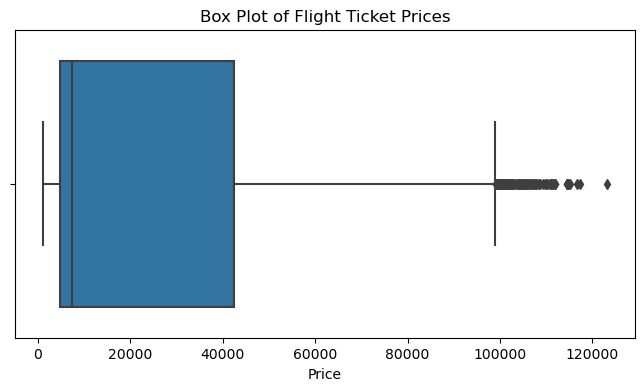

In [10]:
# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['price'])
plt.title('Box Plot of Flight Ticket Prices')
plt.xlabel('Price')
plt.show()

### Airline Analysis

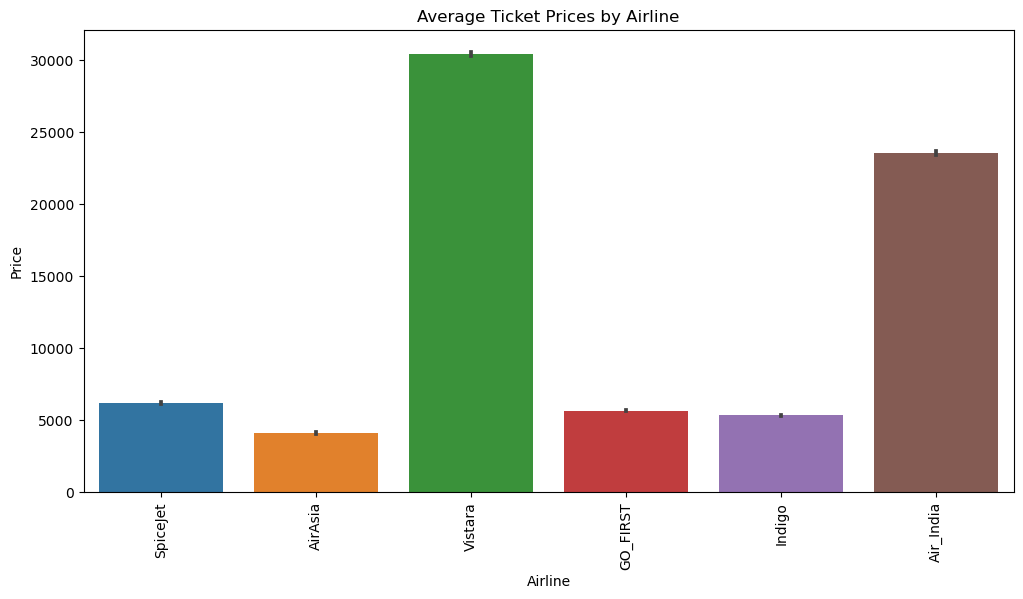

In [11]:
# Create a bar plot to compare airline prices
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', data=data)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Time-Based Patterns

Analyze how ticket prices change based on the time of booking. Look at trends in prices when booking well in advance versus just 1 or 2 days before departure.

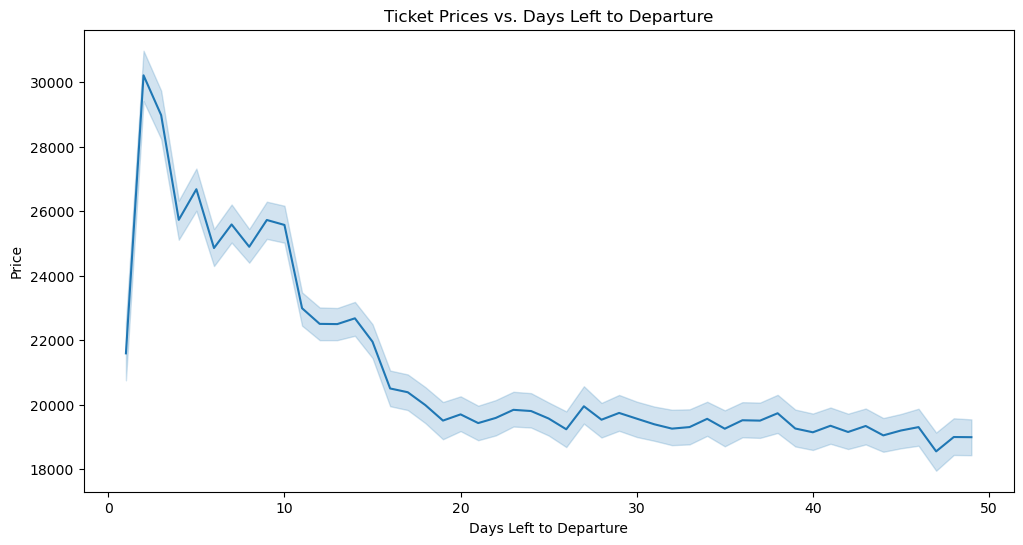

In [12]:
#Create a line plot to visualize price trends based on days left to departure
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=data)
plt.title('Ticket Prices vs. Days Left to Departure')
plt.xlabel('Days Left to Departure')
plt.ylabel('Price')
plt.show()


### Duration vs. Price

Explore the relationship between the duration of the flight and ticket prices

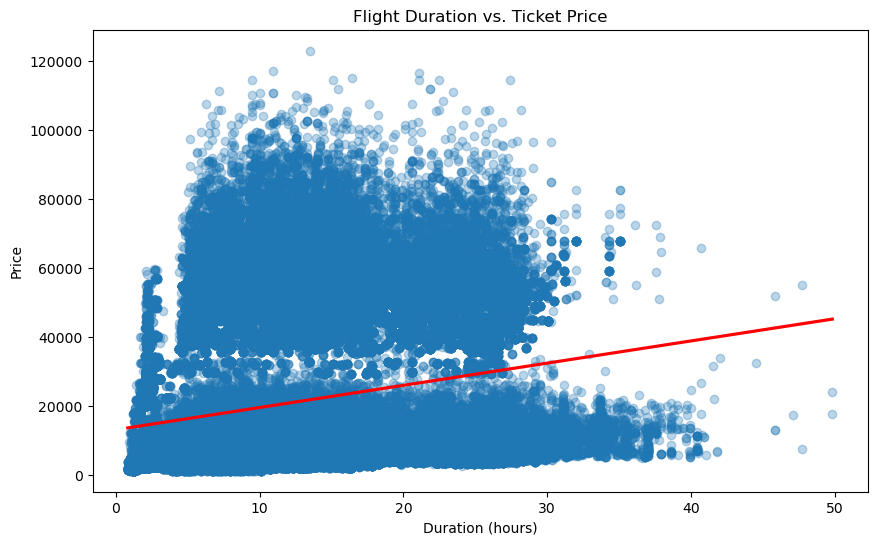

In [13]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='duration', y='price', data=data, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Flight Duration vs. Ticket Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()

#### Correlation Analysis

Calculate and visualize correlations between numerical features (e.g., price, duration) and other variables.

In [14]:
# Select only numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()


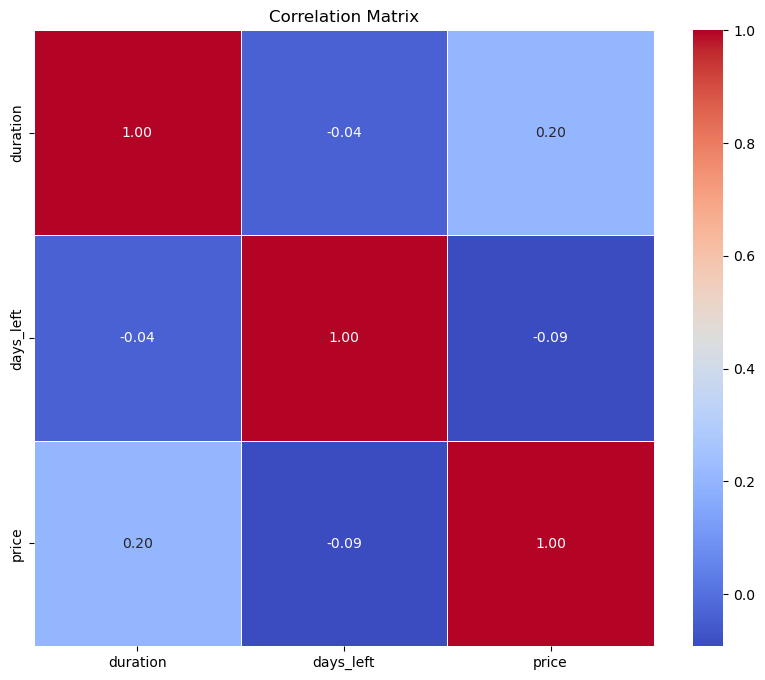

In [15]:
#Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Data Preprocessing

In [16]:
#  Remove redundant columns
dataset = data.drop(columns=["flight", "arrival_time", "departure_time"])

In [17]:
dataset

,airline,source_city,stops,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,zero,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,one,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,one,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,one,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,one,Hyderabad,Business,10.00,49,81585


In [18]:
#spliting the data into trainnig and testing sets(80% training set and 20% of test set)
from sklearn.model_selection import train_test_split

y = dataset['price']
X = dataset.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyperparameter Tuning

We will use a subset of training data to speed up the process.
Once we get parameters for optimised model we will train the the final model on full training data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define categorical and numerical columns
categorical_columns = ['airline', 'source_city', 'stops', 'destination_city', 'class']
numerical_columns = ['duration', 'days_left']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


# Preprocessing of training data 
X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Define a dictionary of models and their respective hyperparameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {}  # Add hyperparameters for Linear Regression if needed
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [40, 60, 100],
            'max_depth': [10, 20, 30],
            'min_samples_split': [3, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Support Vector Machine': {
        'model': SVR(),
        'param_grid': {
            'C': [1, 10],
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

X_train_subset = X_train_transformed[:10000]
y_train_subset = y_train[:10000]

best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model_info in models.items():
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
    
    grid_search.fit(X_train_subset, y_train_subset)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Store the best model and hyperparameters
    best_models[model_name] = {'best_params': best_params, 'best_model': best_model}


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [21]:
X_test_subset = X_test_transformed[:10000]
y_test_subset = y_test[:10000]

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate the best models on subset of the test data
for model_name, model_info in best_models.items():
    best_model = model_info['best_model']
    y_pred_best = best_model.predict(X_test_subset)
    
    mae_best = mean_absolute_error(y_test_subset, y_pred_best)
    mse_best = mean_squared_error(y_test_subset, y_pred_best)
    r2_best = r2_score(y_test_subset, y_pred_best)
    
    print(f"{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
    print(f"Mean Squared Error (MSE): {mse_best:.2f}")
    print(f"R-squared (R2): {r2_best:.2f}")
    print(f"The parameters of the best model:\n{model_info['best_params']}")
    print()

Linear Regression Metrics:
Mean Absolute Error (MAE): 4565.69
Mean Squared Error (MSE): 47189176.63
R-squared (R2): 0.91
The parameters of the best model:
{}

Random Forest Metrics:
Mean Absolute Error (MAE): 2405.08
Mean Squared Error (MSE): 20326354.76
R-squared (R2): 0.96
The parameters of the best model:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 60}

Support Vector Machine Metrics:
Mean Absolute Error (MAE): 13618.99
Mean Squared Error (MSE): 526929999.31
R-squared (R2): -0.01
The parameters of the best model:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}



#### Train The Final Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the best hyperparameters
best_rf_params = {
    'n_estimators': 100,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

best_rf_model = RandomForestRegressor(**best_rf_params)
best_rf_model.fit(X_train_transformed, y_train)


### Evaluate The Final Model

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test_transformed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 1328.1268806948485
Mean Squared Error (MSE): 9618449.433557035
R-squared (R2): 0.9813408725639293


In [ ]:
import joblib

model_filename = 'final_rf_model.joblib'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved as '{model_filename}'")